In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.io import output_file, save

output_notebook()

Loading BokehJS ...

# Preparing Dataset

## Preparing Air Quality Dataset

In [2]:
# Loading dataset

pm25_data = pd.read_csv('PM2.5.csv')
pm25_data.head()

,country_name,country_code,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,25.111399,24.547886,24.155248,23.906832,23.753597,23.721569,24.058755,24.788241,...,29.449472,29.908441,29.070582,27.779344,29.515468,28.877274,27.311377,27.404295,26.248200,26.755686
2,Afghanistan,AFG,64.174097,64.188153,64.210526,64.244141,64.291923,64.356800,64.475992,64.641519,...,61.817056,70.922317,73.131816,77.143728,73.490818,72.765910,65.862347,67.227177,58.330872,46.087094
3,Africa Western and Central,AFW,60.240684,58.514553,57.243345,56.402812,55.947741,55.816673,56.517532,58.174065,...,54.189720,58.213217,46.959269,47.135125,71.295051,62.894132,60.344618,56.099951,50.771962,54.891820
4,Angola,AGO,23.831767,23.443967,23.129464,22.895329,22.748636,22.696458,22.759954,22.922535,...,24.337940,24.480493,24.538658,23.945584,25.002150,25.180701,23.959151,24.265015,24.598811,25.145238


In [3]:
# Unpivot dataset from wide format to long format

pm25_data = pm25_data.melt(id_vars=['country_name', 'country_code'], var_name='year', value_name='pm25')
pm25_data

,country_name,country_code,year,pm25
0,Aruba,ABW,1990,NaN
1,Africa Eastern and Southern,AFE,1990,25.111399
2,Afghanistan,AFG,1990,64.174097
3,Africa Western and Central,AFW,1990,60.240684
4,Angola,AGO,1990,23.831767
...,...,...,...,...
8241,Kosovo,XKX,2020,NaN
8242,"Yemen, Rep.",YEM,2020,34.832360
8243,South Africa,ZAF,2020,23.753069
8244,Zambia,ZMB,2020,24.308592


In [4]:
# Change data type of 'year' column

pm25_data['year'] = pm25_data['year'].astype(int)

In [5]:
# Check the information of the dataset

pm25_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8246 entries, 0 to 8245
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  8246 non-null   object 
 1   country_code  8246 non-null   object 
 2   year          8246 non-null   int32  
 3   pm25          7688 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 225.6+ KB


In [6]:
# Drop missing values from 'pm25' column

pm25_data.dropna(subset='pm25', inplace=True)

In [7]:
# Check the number of missing values

pm25_data.isnull().sum()

country_name    0
country_code    0
year            0
pm25            0
dtype: int64

In [8]:
# Check if all of the countries in one year are different

pm25_group = pm25_data.groupby('year')

years = pm25_data['year'].values

num_unique_countries = []

for year in years:
  num_unique = pm25_group.get_group(year)['country_name'].nunique()

  num_unique_countries.append(num_unique)

print('Unique Number of Years With Unique Number of Countries:',
      len(set(num_unique_countries)))

Unique Number of Years With Unique Number of Countries: 1


In [9]:
# Check summary of statistics

pm25_data.describe(include='all')

,country_name,country_code,year,pm25
count,7688,7688,7688.000000,7688.000000
unique,248,248,NaN,NaN
top,Africa Eastern and Southern,AFE,NaN,NaN
freq,31,31,NaN,NaN
mean,NaN,NaN,2005.000000,28.390574
std,NaN,NaN,8.944854,16.436359
min,NaN,NaN,1990.000000,4.895181
25%,NaN,NaN,1997.000000,16.755624
50%,NaN,NaN,2005.000000,23.958606
75%,NaN,NaN,2013.000000,39.223020


In [10]:
pm25_data.head()

,country_name,country_code,year,pm25
1,Africa Eastern and Southern,AFE,1990,25.111399
2,Afghanistan,AFG,1990,64.174097
3,Africa Western and Central,AFW,1990,60.240684
4,Angola,AGO,1990,23.831767
5,Albania,ALB,1990,22.961579


## Preparing Air Temperature Dataset

In [11]:
# Loading dataset

temp_data = pd.read_excel('Air Temperature at Surface.xlsx')
temp_data.head()

,country_code,country_name,1990-01,1990-02,1990-03,1990-04,1990-05,1990-06,1990-07,1990-08,...,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,ABW,Aruba (Neth.),25.31,24.68,25.03,25.70,26.50,27.05,26.85,27.33,...,26.22,26.83,26.94,27.20,27.48,27.94,28.38,28.26,27.18,26.76
1,AFG,Afghanistan,-1.07,-0.29,4.35,11.64,19.72,22.99,24.57,24.21,...,6.85,12.62,18.81,24.01,25.83,24.99,18.79,11.55,4.97,-1.09
2,AGO,Angola,21.92,22.15,22.15,21.93,21.70,20.86,20.38,21.63,...,23.01,22.71,22.50,20.15,19.72,22.04,23.92,24.97,23.62,22.95
3,AIA,Anguilla (U.K.),24.81,24.02,24.13,24.78,25.91,26.60,26.76,27.47,...,25.00,26.02,26.66,27.32,27.52,27.77,27.65,27.31,26.46,25.66
4,ALB,Albania,2.19,6.13,9.35,10.62,15.03,18.59,21.82,21.21,...,8.22,11.03,15.90,18.35,22.46,22.85,20.07,13.68,8.85,7.30


In [12]:
# Unpivot dataframe from wide format to long format

temp_data = temp_data.melt(id_vars=['country_code', 'country_name'],
                           var_name='year_month', value_name='temperature')


In [13]:
# Check dataset information

temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88164 entries, 0 to 88163
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  88164 non-null  object 
 1   country_name  88164 non-null  object 
 2   year_month    88164 non-null  object 
 3   temperature   88164 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.7+ MB


In [14]:
# Sort values based on country and year_month
temp_data = temp_data.sort_values(['country_code', 'year_month'])

# Convert year_month column format to datetime
temp_data['year_month'] = pd.to_datetime(temp_data['year_month'], format='%Y-%m')

# Extract year from the year_month column
temp_data['year'] = temp_data['year_month'].dt.year

# Obtain mean of temperature for each country and year
temp_data = temp_data.groupby(['country_name', 'country_code', 'year'])['temperature'].mean().reset_index()

In [15]:
temp_data.head()

,country_name,country_code,year,temperature
0,Afghanistan,AFG,1990,12.156667
1,Afghanistan,AFG,1991,11.145000
2,Afghanistan,AFG,1992,10.922500
3,Afghanistan,AFG,1993,11.444167
4,Afghanistan,AFG,1994,11.777500


In [16]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7347 entries, 0 to 7346
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  7347 non-null   object 
 1   country_code  7347 non-null   object 
 2   year          7347 non-null   int32  
 3   temperature   7347 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 201.0+ KB


In [17]:
temp_data.describe(include='all')

,country_name,country_code,year,temperature
count,7347,7347,7347.000000,7347.000000
unique,237,237,NaN,NaN
top,Afghanistan,AFG,NaN,NaN
freq,31,31,NaN,NaN
mean,NaN,NaN,2005.000000,19.288966
std,NaN,NaN,8.944881,8.609868
min,NaN,NaN,1990.000000,-20.360000
25%,NaN,NaN,1997.000000,11.996250
50%,NaN,NaN,2005.000000,23.219167
75%,NaN,NaN,2013.000000,26.094583


## Preparing Precipitation Dataset

In [18]:
# Loading dataset

prec_data = pd.read_excel('Precipitation.xlsx')
prec_data.head()

,country_code,country_name,1990-01,1990-02,1990-03,1990-04,1990-05,1990-06,1990-07,1990-08,...,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,ABW,Aruba (Neth.),44.64,30.96,15.60,45.85,45.81,21.05,35.58,36.01,...,17.53,4.95,3.01,14.38,16.76,47.48,74.15,130.64,235.31,52.32
1,AFG,Afghanistan,82.17,84.49,47.50,52.85,16.99,16.18,7.04,10.65,...,81.40,56.73,36.54,10.91,13.05,12.42,5.42,4.19,34.69,31.53
2,AGO,Angola,211.36,167.18,190.91,92.13,31.48,0.78,0.82,1.47,...,190.01,119.76,7.15,0.61,0.39,8.34,13.77,60.56,180.93,162.57
3,AIA,Anguilla (U.K.),44.92,36.87,34.52,75.35,39.80,49.30,46.59,45.40,...,32.90,26.74,39.94,32.29,111.95,90.27,87.82,133.07,141.46,37.38
4,ALB,Albania,18.23,60.65,32.56,166.53,66.52,24.95,19.90,27.27,...,169.70,84.47,64.81,79.55,24.08,56.57,114.01,187.81,11.61,198.99


In [19]:
# Unpivot dataframe from wide format to long format

prec_data = prec_data.melt(id_vars=['country_code', 'country_name'],
                           var_name='year_month', value_name='precipitation')

In [20]:
# Check dataset information

prec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88164 entries, 0 to 88163
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country_code   88164 non-null  object 
 1   country_name   88164 non-null  object 
 2   year_month     88164 non-null  object 
 3   precipitation  88164 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.7+ MB


In [21]:
# Sort values based on country and year_month
prec_data = prec_data.sort_values(['country_code', 'year_month'])

# Convert year_month column format to datetime
prec_data['year_month'] = pd.to_datetime(prec_data['year_month'], format='%Y-%m')

# Extract year from the year_month column
prec_data['year'] = prec_data['year_month'].dt.year

# Obtain mean of temperature for each country and year
prec_data = prec_data.groupby(['country_name', 'country_code', 'year'])['precipitation'].mean().reset_index()

In [22]:
prec_data.head()

,country_name,country_code,year,precipitation
0,Afghanistan,AFG,1990,32.688333
1,Afghanistan,AFG,1991,43.783333
2,Afghanistan,AFG,1992,40.501667
3,Afghanistan,AFG,1993,29.707500
4,Afghanistan,AFG,1994,31.521667


In [23]:
# Check the information of the dataset

prec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7347 entries, 0 to 7346
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country_name   7347 non-null   object 
 1   country_code   7347 non-null   object 
 2   year           7347 non-null   int32  
 3   precipitation  7347 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 201.0+ KB


In [24]:
# Check summary of statistics

prec_data.describe(include='all')

,country_name,country_code,year,precipitation
count,7347,7347,7347.000000,7347.000000
unique,237,237,NaN,NaN
top,Afghanistan,AFG,NaN,NaN
freq,31,31,NaN,NaN
mean,NaN,NaN,2005.000000,101.407964
std,NaN,NaN,8.944881,68.971834
min,NaN,NaN,1990.000000,0.508333
25%,NaN,NaN,1997.000000,56.430417
50%,NaN,NaN,2005.000000,86.095000
75%,NaN,NaN,2013.000000,134.220833


## Preparing Humidity Dataset

In [25]:
# Loading dataset

hum_data = pd.read_excel('Relative Humidity.xlsx')
hum_data.head()

,country_code,country_name,1990-01,1990-02,1990-03,1990-04,1990-05,1990-06,1990-07,1990-08,...,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,ABW,Aruba (Neth.),82.91,83.81,83.92,85.82,86.23,85.49,85.27,84.62,...,78.70,81.96,85.88,85.55,84.47,84.02,82.87,82.53,83.61,81.23
1,AFG,Afghanistan,75.47,71.47,58.17,54.35,40.26,35.87,32.81,33.74,...,60.35,58.85,41.75,28.02,29.65,29.86,28.05,33.00,50.61,60.76
2,AGO,Angola,77.68,78.51,81.18,75.85,59.72,47.16,42.39,40.84,...,80.29,74.10,51.15,45.31,39.98,43.26,45.57,55.51,71.37,73.43
3,AIA,Anguilla (U.K.),77.63,76.61,77.98,78.69,80.79,81.30,82.47,80.61,...,76.11,76.82,78.84,79.70,81.36,81.56,81.16,80.48,79.07,77.78
4,ALB,Albania,72.85,69.63,64.87,75.34,72.07,66.35,59.70,59.49,...,70.76,63.89,63.92,72.31,62.40,64.83,64.17,75.46,73.52,82.88


In [26]:
# Unpivot dataframe from wide format to long format

hum_data = hum_data.melt(id_vars=['country_code', 'country_name'],
                           var_name='year_month', value_name='humidity')

In [27]:
# Check dataset information

hum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88164 entries, 0 to 88163
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  88164 non-null  object 
 1   country_name  88164 non-null  object 
 2   year_month    88164 non-null  object 
 3   humidity      88164 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.7+ MB


In [28]:
# Sort values based on country and year_month
hum_data = hum_data.sort_values(['country_code', 'year_month'])

# Convert year_month column format to datetime
hum_data['year_month'] = pd.to_datetime(hum_data['year_month'], format='%Y-%m')

# Extract year from the year_month column
hum_data['year'] = hum_data['year_month'].dt.year

# Obtain mean of temperature for each country and year
hum_data = hum_data.groupby(['country_name', 'country_code', 'year'])['humidity'].mean().reset_index()

In [29]:
hum_data.head()

,country_name,country_code,year,humidity
0,Afghanistan,AFG,1990,48.039167
1,Afghanistan,AFG,1991,51.882500
2,Afghanistan,AFG,1992,50.565000
3,Afghanistan,AFG,1993,47.296667
4,Afghanistan,AFG,1994,48.031667


In [30]:
# Check the information of the dataset

hum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7347 entries, 0 to 7346
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  7347 non-null   object 
 1   country_code  7347 non-null   object 
 2   year          7347 non-null   int32  
 3   humidity      7347 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 201.0+ KB


In [31]:
# Check summary of statistics

hum_data.describe(include='all')

,country_name,country_code,year,humidity
count,7347,7347,7347.000000,7347.000000
unique,237,237,NaN,NaN
top,Afghanistan,AFG,NaN,NaN
freq,31,31,NaN,NaN
mean,NaN,NaN,2005.000000,71.034135
std,NaN,NaN,8.944881,13.613082
min,NaN,NaN,1990.000000,23.773333
25%,NaN,NaN,1997.000000,65.704167
50%,NaN,NaN,2005.000000,76.185833
75%,NaN,NaN,2013.000000,80.428333


## Combining Climate Data

In [32]:
climate_data = temp_data.merge(hum_data.merge(prec_data, how='inner',
                                              on=['country_code', 'country_name',
                                                  'year']),
                               how='inner', on=['country_code', 'country_name',
                                                'year'])
climate_data.head()

,country_name,country_code,year,temperature,humidity,precipitation
0,Afghanistan,AFG,1990,12.156667,48.039167,32.688333
1,Afghanistan,AFG,1991,11.145000,51.882500,43.783333
2,Afghanistan,AFG,1992,10.922500,50.565000,40.501667
3,Afghanistan,AFG,1993,11.444167,47.296667,29.707500
4,Afghanistan,AFG,1994,11.777500,48.031667,31.521667


In [33]:
# Check the information of the dataset

climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7347 entries, 0 to 7346
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country_name   7347 non-null   object 
 1   country_code   7347 non-null   object 
 2   year           7347 non-null   int32  
 3   temperature    7347 non-null   float64
 4   humidity       7347 non-null   float64
 5   precipitation  7347 non-null   float64
dtypes: float64(3), int32(1), object(2)
memory usage: 315.8+ KB


In [34]:
# Check summary of statistics

climate_data.describe(include='all')

,country_name,country_code,year,temperature,humidity,precipitation
count,7347,7347,7347.000000,7347.000000,7347.000000,7347.000000
unique,237,237,NaN,NaN,NaN,NaN
top,Afghanistan,AFG,NaN,NaN,NaN,NaN
freq,31,31,NaN,NaN,NaN,NaN
mean,NaN,NaN,2005.000000,19.288966,71.034135,101.407964
std,NaN,NaN,8.944881,8.609868,13.613082,68.971834
min,NaN,NaN,1990.000000,-20.360000,23.773333,0.508333
25%,NaN,NaN,1997.000000,11.996250,65.704167,56.430417
50%,NaN,NaN,2005.000000,23.219167,76.185833,86.095000
75%,NaN,NaN,2013.000000,26.094583,80.428333,134.220833


## Combine Climate Data with Air Quality Data to Create Final Dataset

In [35]:
df = climate_data.merge(pm25_data, how='inner', on=['country_code', 'year'])

In [36]:
# Check if country names are different in these two datasets

df[df['country_name_x'] != df['country_name_y']]

,country_name_x,country_code,year,temperature,humidity,precipitation,country_name_y,pm25
93,American Samoa (U.S.),ASM,1990,26.646667,82.410000,197.114167,American Samoa,6.433882
94,American Samoa (U.S.),ASM,1991,26.877500,82.205000,209.520000,American Samoa,6.401709
95,American Samoa (U.S.),ASM,1992,26.746667,82.468333,187.330000,American Samoa,6.376170
96,American Samoa (U.S.),ASM,1993,26.567500,82.516667,180.994167,American Samoa,6.356748
97,American Samoa (U.S.),ASM,1994,26.634167,82.896667,211.260000,American Samoa,6.342929
...,...,...,...,...,...,...,...,...
6102,Vietnam,VNM,2016,24.546667,80.285000,171.193333,Viet Nam,20.330446
6103,Vietnam,VNM,2017,24.229167,82.035000,197.978333,Viet Nam,18.579780
6104,Vietnam,VNM,2018,24.265833,81.173333,175.761667,Viet Nam,20.163018
6105,Vietnam,VNM,2019,24.836667,79.795000,151.989167,Viet Nam,20.831787


In [37]:
# Drop one of the country name columns and rename the other one
df = df.drop('country_name_y', axis=1)
df = df.rename(columns={'country_name_x': 'country_name'})

In [38]:
df.head()

,country_name,country_code,year,temperature,humidity,precipitation,pm25
0,Afghanistan,AFG,1990,12.156667,48.039167,32.688333,64.174097
1,Afghanistan,AFG,1991,11.145000,51.882500,43.783333,64.188153
2,Afghanistan,AFG,1992,10.922500,50.565000,40.501667,64.210526
3,Afghanistan,AFG,1993,11.444167,47.296667,29.707500,64.244141
4,Afghanistan,AFG,1994,11.777500,48.031667,31.521667,64.291923


In [39]:
# Check the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country_name   6200 non-null   object 
 1   country_code   6200 non-null   object 
 2   year           6200 non-null   int32  
 3   temperature    6200 non-null   float64
 4   humidity       6200 non-null   float64
 5   precipitation  6200 non-null   float64
 6   pm25           6200 non-null   float64
dtypes: float64(4), int32(1), object(2)
memory usage: 315.0+ KB


In [40]:
# Check summary of statistics

df.describe(include='all')

,country_name,country_code,year,temperature,humidity,precipitation,pm25
count,6200,6200,6200.000000,6200.000000,6200.000000,6200.000000,6200.000000
unique,200,200,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN
freq,31,31,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2005.000000,19.342123,69.459488,101.029876,26.783558
std,NaN,NaN,8.944993,8.398934,14.201667,71.801935,16.645367
min,NaN,NaN,1990.000000,-20.360000,23.773333,0.508333,4.895181
25%,NaN,NaN,1997.000000,12.030417,62.607500,53.219375,15.388615
50%,NaN,NaN,2005.000000,23.092917,74.254167,85.489583,22.671898
75%,NaN,NaN,2013.000000,25.965625,79.993542,136.044792,32.635482


In [41]:
# Save the final dataset

df.to_csv('processed_data.csv', index=False)

# EDA

## Plot The Distribution

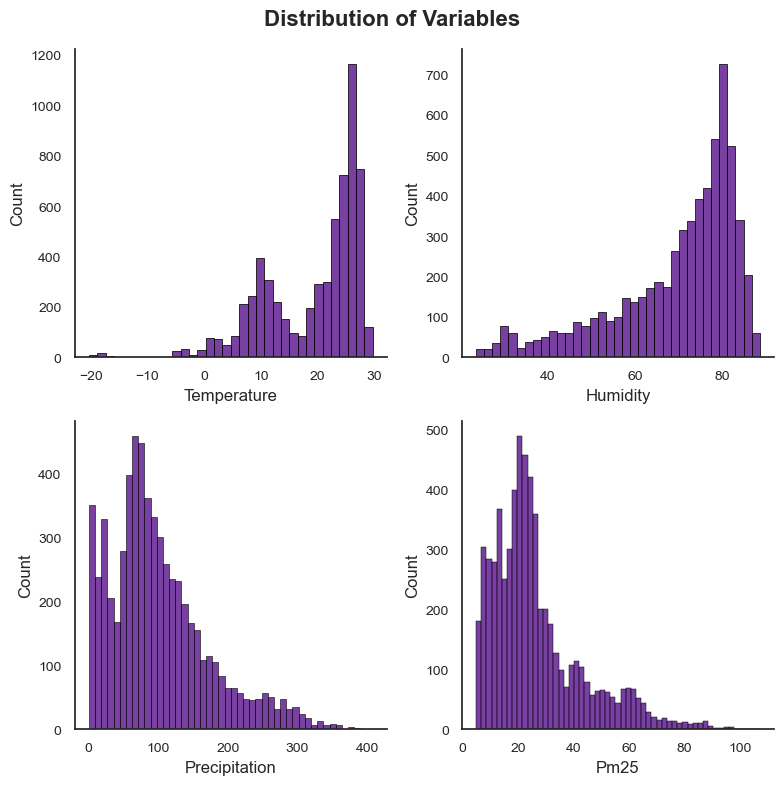

In [42]:
sns.set_theme(style='white')

num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))
axes = axes.flatten()

line_color = 'indigo'

for i, column in enumerate(df.columns[3:7]):
    data = df[column]

    sns.histplot(data, ax=axes[i], color=line_color, edgecolor='black')

    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    axes[i].set_xlabel(column.capitalize(), fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

    axes[i].tick_params(axis='x', labelsize=10, color='black')
    axes[i].tick_params(axis='y', labelsize=10, color='black')

fig.suptitle('Distribution of Variables', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

## Obtaining Mean of Variables by Year

In [43]:
mean_year_pm25 = df.groupby('year')['pm25'].mean()
mean_year_temperature = df.groupby('year')['temperature'].mean()
mean_year_humidity = df.groupby('year')['humidity'].mean()
mean_year_precipitation = df.groupby('year')['precipitation'].mean()

mean_year_df = pd.DataFrame({
    'pm25': mean_year_pm25.values,
    'temperature': mean_year_temperature.values,
    'humidity': mean_year_humidity,
    'precipitation': mean_year_precipitation
})

mean_year_df = mean_year_df.reset_index()
mean_year_df.head()

,year,pm25,temperature,humidity,precipitation
0,1990,28.569270,19.172733,69.757833,99.827925
1,1991,28.183561,18.830687,70.411158,99.179400
2,1992,27.875735,18.751017,69.684962,94.484504
3,1993,27.641077,18.766713,70.030279,100.116612
4,1994,27.474871,19.088696,69.708767,97.336929


## Computation of Measures of Central Tendency

In [44]:
vars = ['pm25', 'temperature', 'humidity', 'precipitation']

means = mean_year_df[vars].mean()
medians = mean_year_df[vars].median()
modes = mean_year_df[vars].mode().iloc[0]

central_tendency = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes,
})

central_tendency.T.round(2)

,pm25,temperature,humidity,precipitation
Mean,26.78,19.34,69.46,101.03
Median,27.10,19.33,69.48,101.11
Mode,23.53,18.75,68.67,94.48


## Bi-variate Analysis

### Trends of Variables Over Time

In [ ]:
source = ColumnDataSource(data={
    'year': mean_year_df['year'],
    'pm25': mean_year_df['pm25'],
    'temperature': mean_year_df['temperature'],
    'humidity': mean_year_df['humidity'],
    'precipitation': mean_year_df['precipitation']
})

plots = []

for col in mean_year_df.columns[1:]:
  series_fig = figure(title=f'{col.capitalize()} Over Time',
                    x_axis_label='Year', y_axis_label=col.capitalize(),
                    tooltips=[("Year", "@year"), (col.capitalize(), f"@{{{col}}}")])
  series_fig.line(x='year', y=col, width=2, color='indigo', source=source)

  series_fig.xgrid.visible = False
  series_fig.ygrid.visible = False

  plots.append(series_fig)

grid1 = gridplot(plots, ncols=4, width=300, height=300)

output_file("trends.html")
show(grid1)

### Scatter Plots for PM2.5 Vs. Cliamte Variables

In [46]:
climate_vars = ['temperature', 'humidity', 'precipitation']

plots = []

for climate_var in climate_vars:
    p = figure(
        width=300, height=300,
        title=f'PM2.5 vs {climate_var.capitalize()}',
        x_axis_label='PM2.5',
        y_axis_label=climate_var.capitalize(),
        tooltips=[('PM2.5', '@pm25'), (climate_var.capitalize(),
                                       f"@{climate_var}")]
    )
    p.scatter(x='pm25', y=climate_var, size=6, source=source, color="indigo",
              alpha=0.6)

    p.xgrid.visible = False
    p.ygrid.visible = False

    plots.append(p)

grid2 = gridplot(plots, ncols=3)

output_file("relationships.html")
show(grid2)


### Relationships between Variables

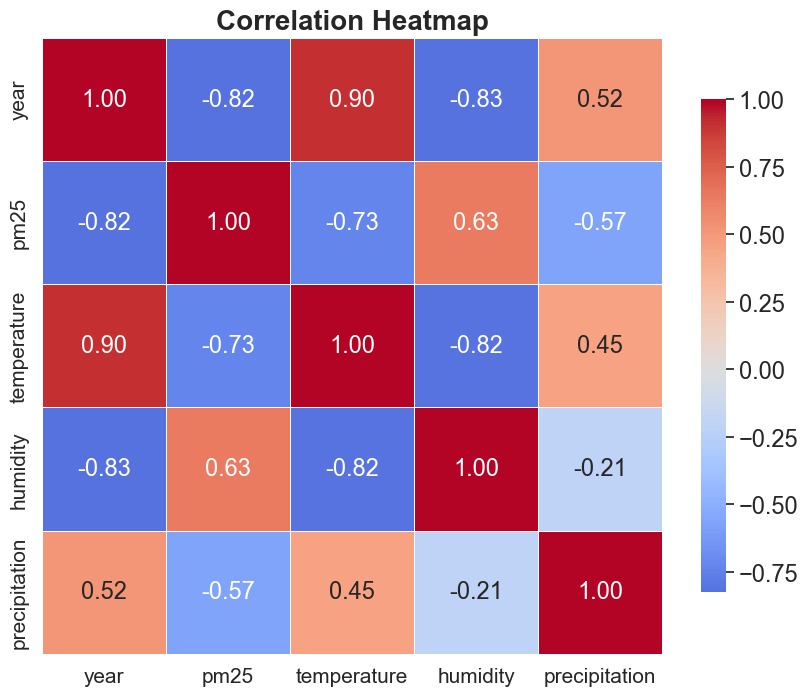

In [47]:
correltaion = mean_year_df.corr(method='pearson')

sns.set_theme(style='white')

plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(correltaion, annot=True, center=0, cmap='coolwarm',
                      fmt='.2f', linewidths=0.5,
                      annot_kws={"size": 17},
                      cbar_kws={'shrink': 0.8})

plt.title('Correlation Heatmap', fontsize=20, weight='bold')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.gca().set_facecolor('white')
plt.gcf().patch.set_facecolor('white')

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)

plt.show()

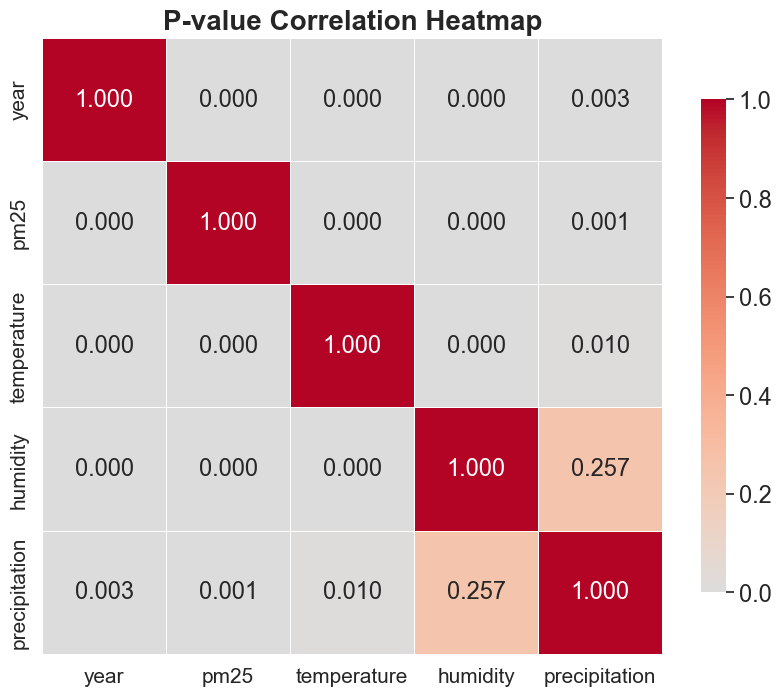

In [48]:
correltaion_pvalue = mean_year_df.corr(method=lambda x, y: stats.pearsonr(x, y)[1])

sns.set_theme(style='white')

plt.figure(figsize=(10, 8))

pvalue_heatmap = sns.heatmap(correltaion_pvalue, annot=True, center=0,
                             cmap='coolwarm', fmt='.3f', linewidths=0.5,
                             annot_kws={"size": 17},
                             cbar_kws={'shrink': 0.8})

plt.title('P-value Correlation Heatmap', fontsize=20, weight='bold')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.gca().set_facecolor('white')
plt.gcf().patch.set_facecolor('white')

cbar = pvalue_heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)

plt.show()